In [39]:
# conda install -c conda-forge scikit-surprise

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


**Import all required libraries**

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split # # Import Surprise package's data splitting function
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from surprise import KNNWithMeans

**Mount the drive**

**Assign the column names and load the dataset**

In [47]:

colnames = ["userId", "productId", "Rating", "timestamp"]
df = pd.read_csv("ratings_Beauty.csv")
df.head(30)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


**Analyse the given data**

In [48]:
df.tail(30)

,UserId,ProductId,Rating,Timestamp
2023040,A14XVBP38Z8HIY,B00LLPT4HI,5.0,1405555200
2023041,A3JJ53IS8XISMT,B00LLPT4HI,5.0,1405900800
2023042,A3LGT6UZL99IW1,B00LLPT4HI,5.0,1405382400
2023043,ASKZO80Z1RKTR,B00LLPT4HI,5.0,1405209600
2023044,A1A7EBY8XJ46PA,B00LLPT4HI,5.0,1405728000
2023045,A1HQ0KTGWQIWYI,B00LLPT4HI,5.0,1405900800
2023046,A3UJRNI8UR4871,B00LLPT4HI,5.0,1405987200
2023047,AZ9JPUSCI0V49,B00LMOT7X4,3.0,1404950400
2023048,A3DEHKPFANB8VA,B00LMWUR9O,5.0,1405555200
2023049,A30JSH9DQY3PB0,B00LMXHR1Y,5.0,1404950400


In [49]:
df.shape

(2023070, 4)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [51]:
df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [52]:
# find minimum and maximum ratings
print('The minimum rating is: %d' %(df['Rating'].min()))
print('The maximum rating is: %d' %(df['Rating'].max()))

The minimum rating is: 1
The maximum rating is: 5


In [53]:
df.isnull().values.any()

False

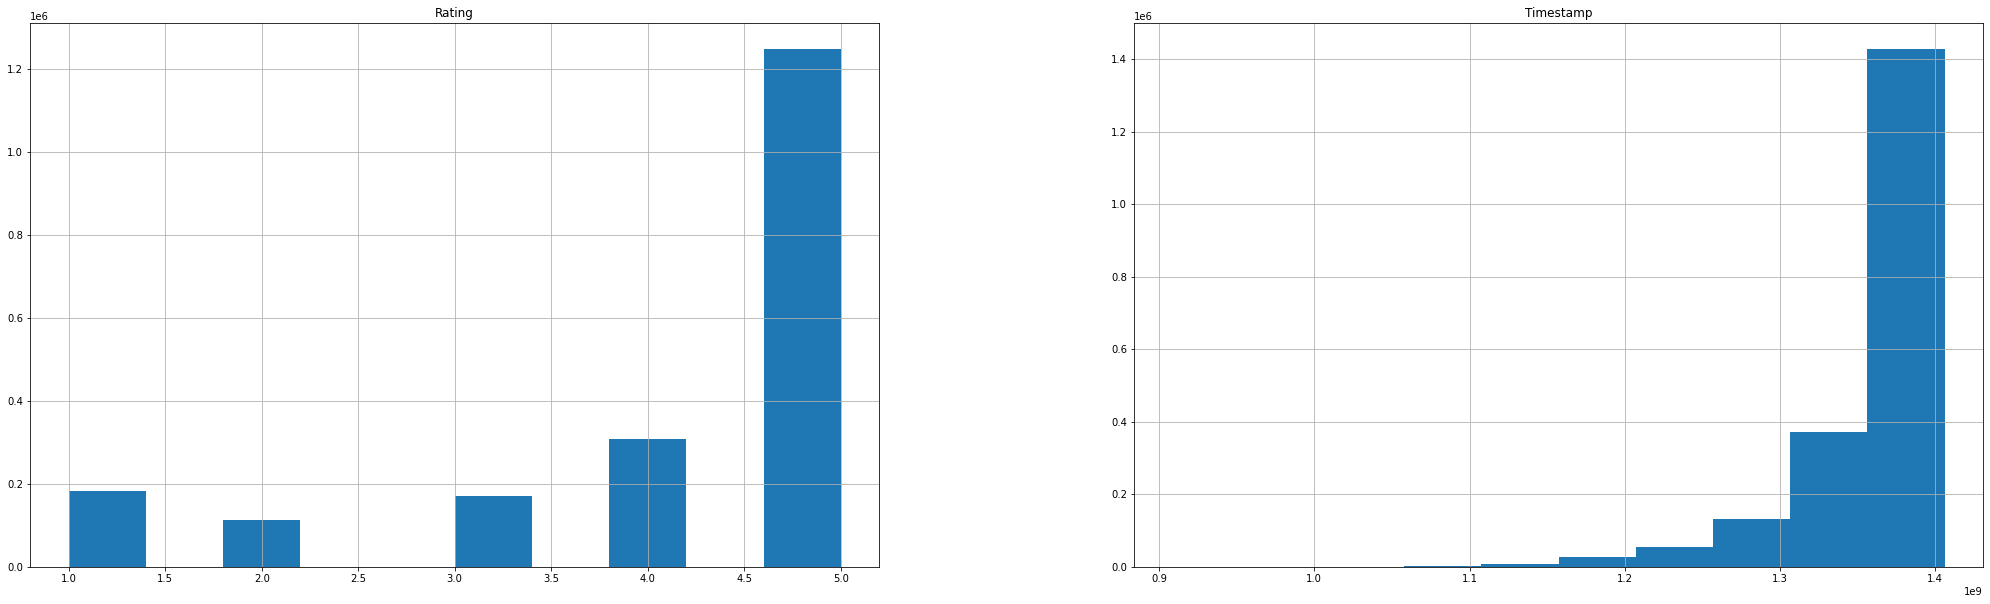

In [54]:
df.hist(figsize=(35, 10))
plt.show()

<AxesSubplot:ylabel='Rating'>

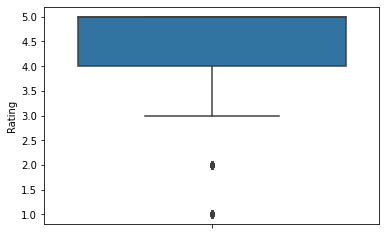

In [55]:
sns.boxplot(y='Rating',data=df)

<AxesSubplot:ylabel='Timestamp'>

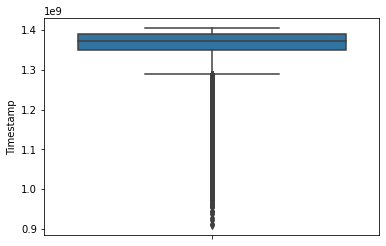

In [57]:
sns.boxplot(y='Timestamp',data=df)

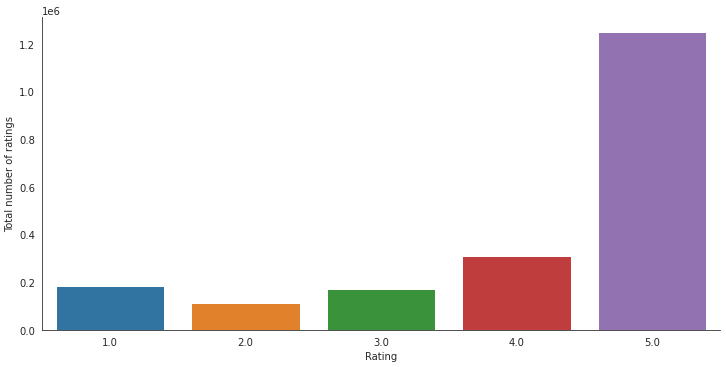

In [58]:
# check the Rating distribution in the range 1-5 for the Data given 

with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [60]:
# Summary of the data
print("Total data ")
print("*"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.UserId)))
print("Total No of products  :", len(np.unique(df.ProductId)))

Total data 
**************************************************

Total no of ratings : 2023070
Total No of Users   : 1210271
Total No of products  : 249274


**Take subset of data by filtering for users who have given more than 50 reviews to avoid working with large dataset**

In [61]:
counts=df['UserId'].value_counts()
df1=df[df['UserId'].isin(counts[counts>=50].index)]
df1.head(30)

,UserId,ProductId,Rating,Timestamp
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
42,A22ZFXQE8AWPEP,1304482596,1.0,1383177600
47,A22ZFXQE8AWPEP,1304482685,1.0,1383177600
52,A22ZFXQE8AWPEP,1304495396,1.0,1384992000
61,A22ZFXQE8AWPEP,1304511111,1.0,1384992000
66,A22ZFXQE8AWPEP,1304511138,1.0,1384992000
86,A22ZFXQE8AWPEP,1304622665,1.0,1386028800
87,A22ZFXQE8AWPEP,1304624498,1.0,1385683200
92,A22ZFXQE8AWPEP,1304651029,1.0,1386028800
102,A22ZFXQE8AWPEP,130466578X,1.0,1386028800


In [62]:
df1.shape

(29559, 4)

# **Popularity based filtering based on Product's ratings**

In [64]:
products_df = pd.DataFrame(df1.groupby('ProductId')['Rating'].mean())
products_df['product_rating_counts'] = pd.DataFrame(df1.groupby('ProductId')['Rating'].count())
products_df.head()

,Rating,product_rating_counts
ProductId,,
0762451459,5.0,1
1304482596,1.0,1
1304482685,1.0,1
1304495396,1.0,1
1304511111,1.0,1


In [65]:
products_df.sort_values('Rating', ascending=False).head()

,Rating,product_rating_counts
ProductId,,
0762451459,5.0,1
B004JAZGOC,5.0,1
B004ITB3IW,5.0,6
B004ITYX52,5.0,1
B004IVM0EG,5.0,1


In [66]:
products_df.sort_values('product_rating_counts', ascending=False).head()

,Rating,product_rating_counts
ProductId,,
B009FKNGGQ,3.816667,60
B00AE0790U,4.140351,57
B009FKNGRA,4.340426,47
B00AO4EBOI,4.152174,46
B008U2Y9BQ,4.108696,46


# **Popularity based filtering based on User's ratings**

In [67]:
users_df = pd.DataFrame(df1.groupby('UserId')['Rating'].mean())
users_df['user_rating_counts'] = pd.DataFrame(df1.groupby('UserId')['Rating'].count())
users_df.head()

,Rating,user_rating_counts
UserId,,
A100WO06OQR8BQ,3.592593,54
A1047EDJ84IMAS,4.317073,82
A10G136JEISLVR,3.426471,68
A10Y59HW4O47N0,4.711538,52
A110PQTEI6THU7,3.196429,56


In [68]:
users_df.sort_values('Rating', ascending=False).head()

,Rating,user_rating_counts
UserId,,
AJGU56YG8G1DQ,5.000000,130
AAEVYY0PHQUUL,5.000000,60
A135SX8ESCQV9B,5.000000,52
ALEW5AUKCRWHN,5.000000,55
A1Q1Z7IR79G52A,4.985507,69


In [69]:
users_df.sort_values('user_rating_counts', ascending=False).head()

,Rating,user_rating_counts
UserId,,
A3KEZLJ59C1JVH,3.704370,389
A281NPSIMI1C2R,4.791667,336
A3M174IC0VXOS2,4.414110,326
A2V5R832QCSOMX,4.417266,278
A3LJLRIZL38GG3,4.550725,276


# **Collaborative based filtering and get the scores for different models**

In [71]:
reader = Reader(rating_scale=(0.5,5))

data = Dataset.load_from_df(df1[['UserId', 'ProductId', 'Rating']], reader)

# Use the famous SVD algorithm.
svd = SVD()

# Run 5-fold cross-validation and print results.

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0390  1.0432  1.0329  1.0287  1.0542  1.0396  0.0088  
MAE (testset)     0.7918  0.7851  0.7889  0.7795  0.7893  0.7869  0.0043  
Fit time          1.18    1.09    1.06    1.03    1.05    1.08    0.05    
Test time         0.03    0.02    0.02    0.02    0.02    0.02    0.00    


{'test_rmse': array([1.03899821, 1.04319453, 1.03287939, 1.02868472, 1.05417268]),
 'test_mae': array([0.79177561, 0.78509137, 0.78888079, 0.77950155, 0.78930788]),
 'fit_time': (1.1752638816833496,
  1.0898282527923584,
  1.0565369129180908,
  1.032517910003662,
  1.0461971759796143),
 'test_time': (0.026595115661621094,
  0.024197816848754883,
  0.022382259368896484,
  0.023370027542114258,
  0.022624969482421875)}

In [72]:
# Split the data into 70% / 30%
trainset, testset = train_test_split(data, test_size=.30)

# Run SVD algorithm
svd=SVD()

#Build the model
svd.fit(trainset)
predictions=svd.test(testset)

# Compute errors

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.0279
MAE:  0.7772


0.7771666262182314

In [73]:
#Define userid and productid in the string format as required

uid=str(150)
pid=str(10000)

# Get predictions

pred=svd.predict(uid, pid, r_ui=4, verbose=True)

user: 150        item: 10000      r_ui = 4.00   est = 4.17   {'was_impossible': False}


In [74]:

param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)

{'rmse': 1.0480972816846261, 'mae': 0.8147035686170631}
{'rmse': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}, 'mae': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}}


In [75]:
# GridSearch with KNNbasic

param_grid = {'min_k':[2,3,4], 'k':[5,10,20] }
gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi